# Dimensionality Reduction


by: Tarun Martheswaran

The main goal of scRNA-seq analyses is to compare several cells based on their expression values of several different genes. Each of these genes can represent a "dimension" of the data. 

For example, we can easily create a data set with two genes:

In [19]:
#A sample dataframe with 2 genes. We choose random values here for the sake of demonstration
#Try to understand each line of this code for practice 
sampledf <- data.frame("Cell 1" = c(1:2), "Cell 2"= c(3:4), "Cell 3"= c(5:6))
row.names(sampledf) <- c("Gene1", "Gene2")
sampledf

,Cell.1,Cell.2,Cell.3
,<int>,<int>,<int>
Gene1,1,3,5
Gene2,2,4,6


With this data, we can simply make a two-dimensional plot:

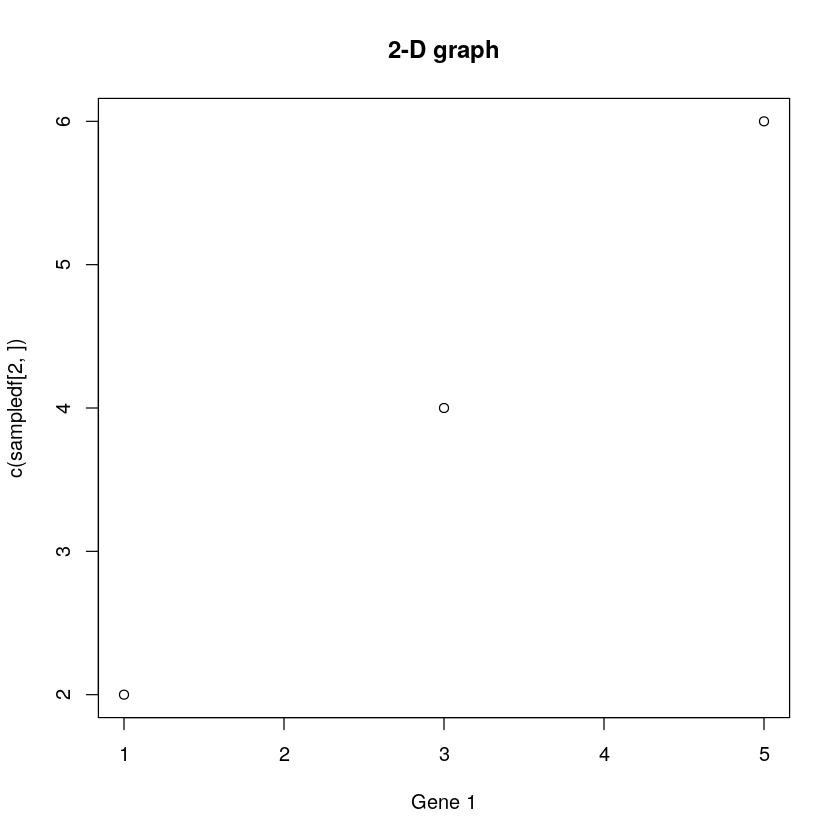

In [20]:
#How did I create this plot?
#What does each axis represent here
plot(c(sampledf[1,]), c(sampledf[2,]), 
     main="2-D graph", 
     xlab="Gene 1")

What happens when the number of genes is more than 2? How about 1000, as shown below? 

In [21]:
#What are the dimensions of this matrix? How many different genes?
#Can you plot the gene expression across cells now?
sampledf <- matrix(c(1:2000), nrow=1000)
rownames(sampledf) <- c()
(sampledf)

1,1001
2,1002
3,1003
4,1004
5,1005
6,1006
7,1007
8,1008
9,1009
10,1010
11,1011


This looks more realistic. How should we approach this? The goal of **dimensionality reduction** is to reduce these separate dimensions. We do not have to store separate information for individual genes, but instead can "compress" the data set into a single dimension. What are the benefits?:
* Reduced Noise
* Efficient Plotting 
* Still provides precise representation of data

## Principal Component Analysis (PCA)

**Principle Component Analysis, or PCA** is a tehcnique of dimensionality reduction that discovers axes in space. A simple way to think about is to imagine each axis as a line. We draw a line, and move all cells in our dataset onto this line by the shortest path. The variance of this "axis" is determined byt the variance of each data point. The first principle component axis captures the greatest variance. The next is chosen orthogonally to the first, and the process repeats. 

After normalizing the data, PCA is formed with the following commands:

In [23]:
runPCA() 
#function from the scater package 
#Try to find out the parameters and what is does

reducedDim()
# Tells new dimensions of matrix after PCA process

ERROR: Error in runPCA(): could not find function "runPCA"


## Visualization

Plotting is very important when dealing with dimensionality reduction. Computers can deal with the 10-50 "axes" proposed by PCA, but this is still far more than we can understand. Here are few strategies to compress the data into 2 or 3 dimensions, and how to interpret the plots. Let's use the IRIS dataset 

In [7]:
#Go look for what these packages do
library(ggplot2)
library(cowplot)
library(ggplot2)
library(cowplot) # required to arrange multiple plots in a grid
theme_set(theme_bw(base_size=12)) # set default ggplot2 theme
library(dplyr)
library(grid)


head(iris) # The IRIS dataset
str(iris) # structure of the dataset
sum(is.na(iris)) #Any NULL values
summary(iris)
#What does this command give us?
#What does it give a "summary" on





********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


[1] 0

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [8]:
iris %>% select(-Species) %>% # remove Species column
  scale() %>%                 # scale to 0 mean and unit variance
  prcomp() ->                 # do PCA
  pca                    

pca #what does the output show?

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

In [10]:
#We want to plot PC2 vs PC1
head(pca$x) #this is the rotated data
 
#But what species is each observation?

#Creating a a dataframe to include the species
pca_data <- data.frame(pca$x, Species=iris$Species)


head(pca_data)

PC1,PC2,PC3,PC4
-2.257141,-0.4784238,0.12727962,0.024087508
-2.074013,0.6718827,0.23382552,0.102662845
-2.356335,0.3407664,-0.04405390,0.028282305
-2.291707,0.5953999,-0.09098530,-0.065735340
-2.381863,-0.6446757,-0.01568565,-0.035802870
-2.068701,-1.4842053,-0.02687825,0.006586116


,PC1,PC2,PC3,PC4,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-2.257141,-0.4784238,0.12727962,0.024087508,setosa
2,-2.074013,0.6718827,0.23382552,0.102662845,setosa
3,-2.356335,0.3407664,-0.04405390,0.028282305,setosa
4,-2.291707,0.5953999,-0.09098530,-0.065735340,setosa
5,-2.381863,-0.6446757,-0.01568565,-0.035802870,setosa
6,-2.068701,-1.4842053,-0.02687825,0.006586116,setosa


Now we must plot the PCA as usual. If you are not familiar with ggplot, try to understand what each part is doing

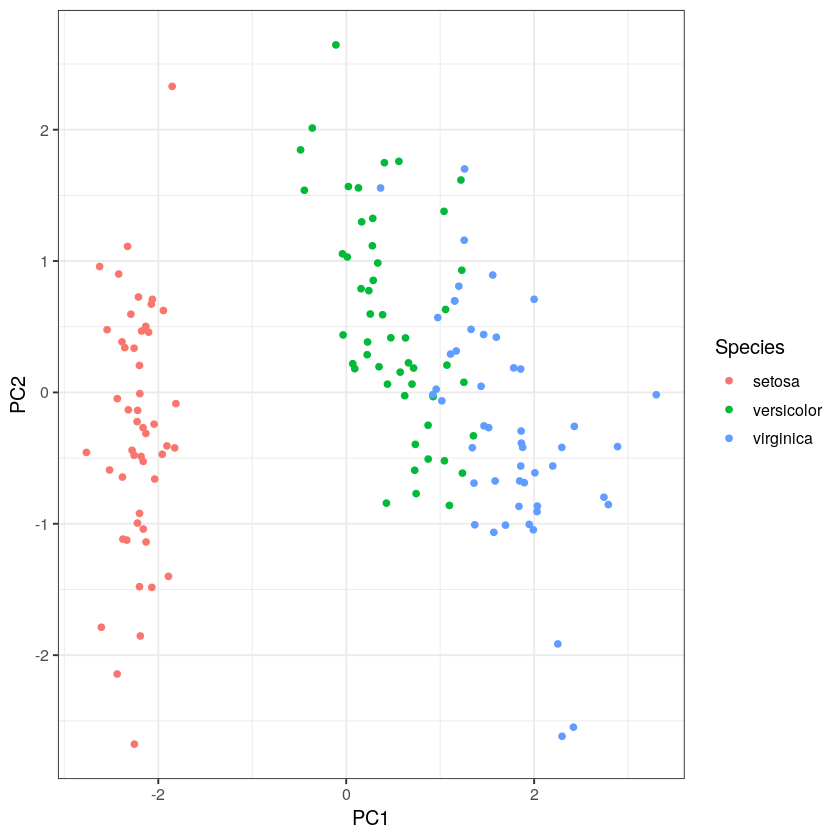

In [11]:
ggplot(pca_data, aes(x=PC1, y=PC2, color=Species)) + geom_point()


Now let's try a UMAP transformation. Uniform Manifold Approximation and Projection (UMAP) is an algorithm for dimensional reduction. We can use the "umap" package in R to perfro mdata transformations. It constructs a high dimensional graph representation on the data, then optimizes a low-dimensional graph to be as similar as possible. The main benefits of using UMAP are as follows:

* Non linear dataset
* Superior time performance over other techniques
* No computational restrictions


In [22]:
library(umap)
#Start from scratch 
#First four columns have data, last column has a label
iris.data = iris[, grep("Sepal|Petal", colnames(iris))]
iris.labels = iris[, "Species"]

umap <- umap(iris.data) #umap() does this for us!

In [15]:
umap #what does the umap object look like?

umap embedding of 150 items in 2 dimensions
object components: layout, data, knn, config



In [17]:
head(umap$layout, 3)

12.76265,-0.7785278
13.73278,1.0068403
14.20189,0.6017527


Below is a function called plot.iris that deals with graphing UMAP based on our layout above. It is not important to understnad how the plot function is coded, but remember to study the plot. 

In [32]:
#Now we plot the dataset

#Custom function for "plot.iris"
#Not important to understand, but c
plot.iris <- function(x, labels,
          main="A UMAP visualization of the Iris dataset",
         colors=c("#ff7f00", "#e377c2", "#17becf"),
          pad=0.1, cex=0.65, pch=19, add=FALSE, legend.suffix="",
       cex.main=1, cex.legend=1) {
 
   layout = x
   if (is(x, "umap")) {
    layout = x$layout
   } 
  
  xylim = range(layout)
  xylim = xylim + ((xylim[2]-xylim[1])*pad)*c(-0.5, 0.5)
   if (!add) {
    par(mar=c(0.2,0.7,1.2,0.7), ps=10)
    plot(xylim, xylim, type="n", axes=F, frame=F)
     rect(xylim[1], xylim[1], xylim[2], xylim[2], border="#aaaaaa", lwd=0.25)  
   }
   points(layout[,1], layout[,2], col=colors[as.integer(labels)],
          cex=cex, pch=pch)
   mtext(side=3, main, cex=cex.main)
 
   labels.u = unique(labels)
   legend.pos = "topright"
   legend.text = as.character(labels.u)
  if (add) {
     legend.pos = "bottomright"
     legend.text = paste(as.character(labels.u), legend.suffix)
   }
   legend(legend.pos, legend=legend.text,
          col=colors[as.integer(labels.u)],
          bty="n", pch=pch, cex=cex.legend)
 }



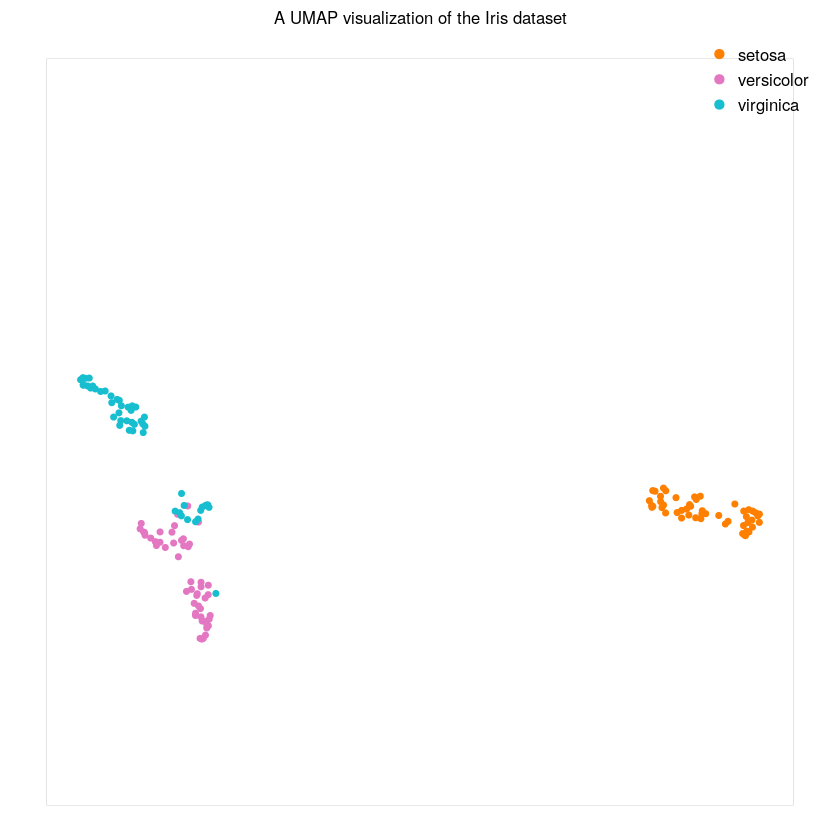

In [33]:
plot.iris(umap, iris.labels)

## t-SNE

T-distributed stochastic neighbour embedding (t-SNE) is another technique that takes a high dimensional data set and reduces it to a low dimensional graph that retains a lot of the original information. 

## Comparing Dimensionality Reduction Techniques

### PCA pro 
* Highly interpretable, computationally efficient

#### PCA con
* PCA is a linear dimensional reduction technique and therefore deemed very inappropriate for data visualisation

### tSNE pro 
* powerfully captures the non-linearity in high dimensional datasets and is able to retain the local structures in low dimensions (much better than PCA)

### tSNE con
* t-SNE is a stochastic method, there is a random initialisation involved and it doesn’t produce similar outputs on successive runs

And finally, we must include some extra pros for UMAP, because it is so great. 

### UMAP pro(s)
* superior run time performance over t-SNE
* no computational restrictions on embedding dimensions and can be used as an effective pre-processing step to boost the performance of density based clustering algorithms.
* better preservation of a data’s global structure

### UMAP con
* lower dimension embeddings of UMAP lack strong interpretability.
* Nothing else worth mentioning. UMAP is great!

